In [18]:
import time
import numpy as np

In [19]:
import sys
import statistics as stat

In [20]:
min_bits = 11
max_bits = 36
range_bits = list(range(min_bits,max_bits+1)) 

In [21]:
def oracle(value):
    pass
    return 0

In [22]:
def check_DJ(nb_bits):
    first_value = oracle(0)
    max_val = 2**(nb_bits - 1) + 1
    for value in range(1,max_val):
        if oracle(value) != first_value:
            return 1
    return 0

In [6]:
# Simon can skip this to save time
classic_time = [0.0] * len(range_bits)
outcomes = [0] * len(range_bits)
for index_bits in range(len(range_bits)):
    nb_bits = range_bits[index_bits]
    time_1 = time.time()
    outcomes[index_bits] = check_DJ(nb_bits)
    time_2 = time.time()
    classic_time[index_bits] = time_2 - time_1

In [6]:
print(classic_time)

NameError: name 'classic_time' is not defined

In [23]:
# This has been run from 11 to 36 bits
classic_time = [
    0.00011348724365234375,
    0.00023436546325683594, 
    0.00046324729919433594, 
    0.0009922981262207031, 
    0.0019681453704833984, 
    0.0036890506744384766, 
    0.007636070251464844, 
    0.015123844146728516, 
    0.02998495101928711, 
    0.06107974052429199, 
    0.11802506446838379, 
    0.2440321445465088, 
    0.48617100715637207, 
    0.9468193054199219, 
    1.8909051418304443, 
    3.910416603088379, 
    7.771848917007446, 
    15.125396728515625,
    29.934565544128418, 
    59.82556629180908, 
    119.86157250404358,
    242.8884973526001, 
    490.281861782074,
    1004.4115877151489, 
    2013.2166793346405, 
    4068.674394607544]

In [24]:
quantum_ms = [
    501526,
    542486, 
    583446,
    624406,
    665366,
    706326, 
    747286,
    788246, 
    829206,
    870166, 
    911126,
    952086,  
    993046,
    1.03401e+06,
    1.07497e+06,
    1.11593e+06
]

In [25]:
quantum_data = np.array([range_bits[1:len(quantum_ms)+1],np.multiply((1/1000),quantum_ms)],dtype=object)[1]
print(quantum_data)

[501.526 542.486 583.446 624.4060000000001 665.366 706.326
 747.2860000000001 788.246 829.206 870.166 911.126 952.086 993.046 1034.01
 1074.97 1115.93]


In [26]:
fidelity = [
    (921/1024),
    (904/1024),
    (895/1024),
    (876/1024),
    (888/1024),
    (856/1024),
    (866/1024),
    (862/1024),
    (835/1024),
    (821/1024),
    (849/1024),
    (816/1024),
    (805/1024),
    (813/1024),
    (809/1024),
    (787/1024)
]

In [27]:
infidelity = [1.0 - value for value in fidelity]

In [28]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import optimize
from scipy import stats

In [29]:
linfunc = lambda p,x : p[0] + np.multiply(p[1],x)
expfunc = lambda p,x : p[0]*np.exp(p[1]*x)
powfunc = lambda p,x : p[0]*x**p[1]
errfunc_lin = lambda p,x,y : y - linfunc(p,x)
errfunc_exp = lambda p,x,y : y - expfunc(p,x)
errfunc_pow = lambda p,x,y : y - powfunc(p,x)
linplot = lambda x,b,slope: b + x*slope
expplot = lambda x,amp,coeff: amp*np.exp(coeff*x)
powplot = lambda x,amp,pow: amp*x**pow

In [30]:
p_class = [10e-9,0.745]
plot_range = range_bits + list(range(range_bits[-1]+1,range_bits[-1]+2))
segments = 2
fit_range = [12 + (x-segments)/segments for x in range(segments * len(plot_range)-segments+1)]
classical_fit = [expfunc(p_class,x) for x in fit_range]
print(fit_range)
print(classical_fit)
print(plot_range)

[11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0]
[3.622790991916126e-05, 5.257968424280907e-05, 7.63119705564705e-05, 0.00011075602552725617, 0.0001607466967651789, 0.00023330108134439535, 0.0003386035026024549, 0.0004914350645696439, 0.0007132484479114162, 0.0010351791826119262, 0.0015024160841162987, 0.0021805443228832444, 0.003164751492164059, 0.004593188912533255, 0.006666363674511464, 0.009675283444054127, 0.01404230466464131, 0.02038041794173863, 0.029579292388223623, 0.04293015681470284, 0.06230704710396422, 0.09042986112471021, 0.13124614571108628, 0.19048520643264263, 0.27646231950735045, 0.40124593158057614, 0.5823516850211621, 0.8452010558987684, 1.2266897190594221, 1.7803665250346226, 2.5839500520916365, 3.75

In [31]:
p_class = [quantum_data[0],quantum_data[-1] - quantum_data[-2]]
#plot_range = range_qubits + list(range(range_qubits[-1]+1, 31))
quantum_fit = [linfunc(p_class,x-plot_range[1]) for x in plot_range]
print(quantum_fit)

[460.566, 501.526, 542.4860000000001, 583.4460000000001, 624.4060000000002, 665.3660000000002, 706.3260000000002, 747.2860000000003, 788.2460000000003, 829.2060000000004, 870.1660000000004, 911.1260000000004, 952.0860000000005, 993.0460000000005, 1034.0060000000005, 1074.9660000000006, 1115.9260000000006, 1156.8860000000006, 1197.8460000000007, 1238.8060000000007, 1279.7660000000008, 1320.7260000000008, 1361.6860000000008, 1402.6460000000009, 1443.606000000001, 1484.566000000001, 1525.526000000001]


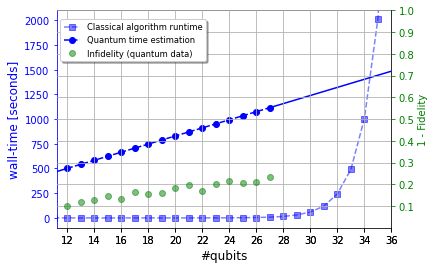

In [43]:
from pylab import figure, show, legend, ylabel
import math
 
# create the general figure
fig1 = figure()
 
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(range_bits,classic_time, 'gs-', linestyle="dashed", label='Classical algorithm runtime', alpha=0.5, color='blue')
line3 = ax1.plot(list(range(min_bits+1,min_bits+1+len(quantum_data))),quantum_data,'bo-', linestyle="dashed",label='Quantum time estimation')
#ax1.plot(fit_range,classical_fit, color='green')    # ,fmt='co--',capsize=6.55
ax1.plot(plot_range[len(quantum_data):],quantum_fit[len(quantum_data):], color='blue')    # ,fmt='co--',capsize=6.55
ax1.plot(plot_range[:2],quantum_fit[:2], color='blue')    # ,fmt='co--',capsize=6.55
ax1.set_xlim([11.2,35])
ax1.set_xticks(range(12,math.floor(plot_range[-1]),2))
#ax1.set_xticks(range(12,math.floor(fit_range[-8]),2))
#ax1.grid()
plt.xlabel("#qubits", fontsize='large')
plt.ylabel("wall-time [seconds]", fontsize='large')
#ax1.legend(loc='best', shadow=True, fontsize='small')
#ax1.tick_params(axis='y',colors='blue')
#ax1.spines['left'].set_color('blue')
#ax1.yaxis.label.set_color('blue')

 
# now, the second axes that shares the x-axis with the ax1
ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(range(min_bits+1,min_bits+1+len(fidelity)),infidelity, 'om-',linestyle="None", label="Infidelity (quantum data)",color='green',alpha=0.5)
#line2 = ax2.plot(range(min_bits,22+1),infidelity, 'ob-',)
ax2.yaxis.tick_right()
ax2.set_ylim(0.0,1.0)
ax2.yaxis.set_label_position("right")
ax2.set_yticks([i/10 for i in range(1,11)])
ylabel("1 - Fidelity")
fig1.legend(bbox_to_anchor=(0.13, 0.78, 1., .102),loc='upper left', shadow=True, fontsize='small')
#ax2.set_xlim([11,31])
#ax2.set_xticks(range(12,31,2))

ax2.tick_params(axis='y',colors='green')
ax2.spines['right'].set_color('green')
ax2.yaxis.label.set_color('green')

ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y',colors='blue')
ax1.spines['left'].set_color('blue')

ax2.grid()


ax1.set_ylim([-100,2100])

# for the legend, remember that we used two different axes so, we need 
# to build the legend manually
#fig1.legend((line1, line2, line3), ("1", "2", "3"))
plt.savefig('qbstrDJ.png', dpi=300)
show()